In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data set

In [3]:
netflix_overall=pd.read_csv('netflix_titles.csv')
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Checking data

In [8]:
netflix_overall.shape

(7787, 12)

### Database có tổng cộng 12 columns và 7787 rows

In [11]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Phân tích Movies vs TV show

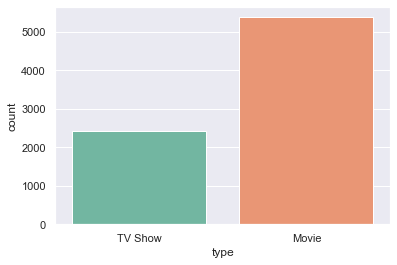

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall,palette="Set2")

### Số lượng Movie cao cấp đôi số lượng TV show

# Phân tích Movie Ratings

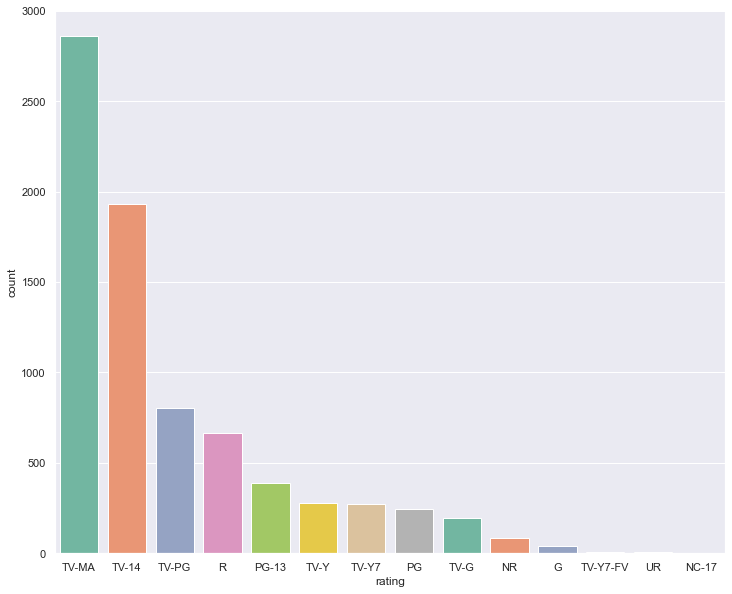

In [19]:

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_overall, palette="Set2", order=netflix_overall['rating'].value_counts().index[0:15])

### TV-MA là thể loại được sản xuất nhiều nhất do phù hợp với mọi đối tượng người xem.
### TV-14 là những chương trình có nội dung không phù hợp với trẻ em dưới 14 tuổi và đứng thứ 02. Các phim dán nhãn R (17+) đứng vị trí thứ 04.

# Phân tích IMDB ratings và các phim đứng top Netflix

In [20]:
imdb_ratings=pd.read_csv("IMDb ratings.csv",usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv("IMDb movies.csv",usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'],inplace=True)
ratings.shape

C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(85852, 4)

### Dùng inner join giữa ratings dataset và netflix dataset để lấy dữ liệu chứa ratings trên IMDB & có mặt trên Netflix.

In [21]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating',ascending=False)

## Top quốc gia được nhiều rating nhất

In [43]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


# Phân tích những năm có lượng phim sản xuất nhiều nhất

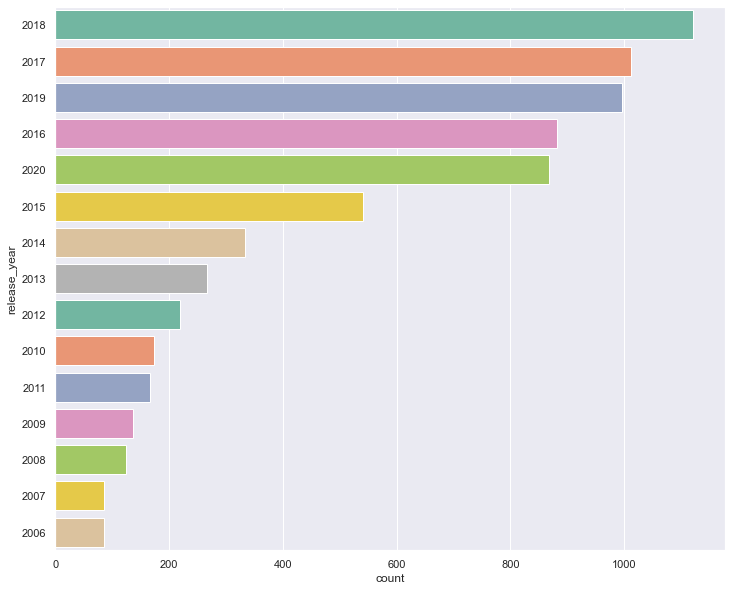

In [46]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y="release_year",data=netflix_overall,palette="Set2",order=netflix_overall['release_year'].value_counts().index[0:15])

### Từ biểu đồ cho thấy năm 2018 có lượng phim phát hành nhiều nhất